# Generate Data

In [1]:
source('simData.R')
library("caret")
library("WGCNA")
library(randomForest)
library("fuzzyforest")

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'WGCNA' was built under R version 3.6.1"Loading required package: dynamicTreeCut
Loading required package: fastcluster

Attaching package: 'fastcluster'

The following object is masked from 'package:stats':

    hclust



Attaching package: 'WGCNA'

The following object is masked from 'package:stats':

    cor

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Warning message:
"package 'fuzzyforest' was built under R version 3.6.1"

In [2]:
n <- 500 # number of patients
T <-  5 # number of observations per patients
data <- as.data.frame(sim_4(n, T)) # CS

In [3]:
# create time variable, rename target variable, arrange these two to the front for ease of use
colnames(data)[401] <- "y"
# data %<>% dplyr::select(y, time, everything())
data[1:5,]

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V392,V393,V394,V395,V396,V397,V398,V399,V400,y
1.2719217,1.7668507,1.6903064,1.21129492,1.34628820,1.2329241,2.3532846,0.8806618,1.9733580,0.75863189,...,-1.1482512,0.57373186,0.3204734,0.3927454,-1.05856039,1.1984350,-1.3959263,0.953741250,-1.3275636,26.9761686
0.6353484,0.7419784,1.0660212,0.35046734,0.62172639,0.2387883,1.3516624,0.5457182,1.1647020,0.61371633,...,0.1658608,0.05977775,0.3701491,-0.5266828,-0.03337578,1.3475807,-1.1759981,-0.986217099,-0.2158460,17.1877518
-0.1120994,0.2980146,0.7727783,-0.06116564,0.06004742,0.1129295,0.8181440,-0.1073570,-0.2584605,0.03746656,...,0.3467319,-0.05206359,0.0448035,0.2768339,-0.73087177,0.7613058,-0.8180394,0.481443199,-0.7850385,0.7477632
0.6925869,0.7199514,1.1647245,1.61763964,0.54485399,0.6256065,1.1134648,0.5996486,0.9513526,0.44800542,...,-0.9285754,-0.47094721,0.7950234,-0.2127428,0.34196348,0.9888117,-0.2332905,-0.005325465,-1.0502116,9.4623596
0.9594067,0.5753907,0.9809523,0.54023707,1.19515260,0.5353647,0.9941542,0.6813629,1.1687739,0.26722549,...,-0.6646974,-0.36222129,-0.2860250,0.9848538,-0.51920485,1.3284371,-1.5313806,0.549365032,-0.6778935,9.3108498


In [4]:
# fit a linear model and output the ranking of important features
# lm_mod = lm(y ~., data)
# # rank the varImp
# imp <- as.data.frame(varImp(lm_mod))
# imp <- data.frame(overall = imp$Overall,
#            names   = rownames(imp))
# imp[order(imp$overall,decreasing = T),][1:10,]

In [5]:
data$time <- rep(1:T,n)
data[1:5,]

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V393,V394,V395,V396,V397,V398,V399,V400,y,time
1.2719217,1.7668507,1.6903064,1.21129492,1.34628820,1.2329241,2.3532846,0.8806618,1.9733580,0.75863189,...,0.57373186,0.3204734,0.3927454,-1.05856039,1.1984350,-1.3959263,0.953741250,-1.3275636,26.9761686,1
0.6353484,0.7419784,1.0660212,0.35046734,0.62172639,0.2387883,1.3516624,0.5457182,1.1647020,0.61371633,...,0.05977775,0.3701491,-0.5266828,-0.03337578,1.3475807,-1.1759981,-0.986217099,-0.2158460,17.1877518,2
-0.1120994,0.2980146,0.7727783,-0.06116564,0.06004742,0.1129295,0.8181440,-0.1073570,-0.2584605,0.03746656,...,-0.05206359,0.0448035,0.2768339,-0.73087177,0.7613058,-0.8180394,0.481443199,-0.7850385,0.7477632,3
0.6925869,0.7199514,1.1647245,1.61763964,0.54485399,0.6256065,1.1134648,0.5996486,0.9513526,0.44800542,...,-0.47094721,0.7950234,-0.2127428,0.34196348,0.9888117,-0.2332905,-0.005325465,-1.0502116,9.4623596,4
0.9594067,0.5753907,0.9809523,0.54023707,1.19515260,0.5353647,0.9941542,0.6813629,1.1687739,0.26722549,...,-0.36222129,-0.2860250,0.9848538,-0.51920485,1.3284371,-1.5313806,0.549365032,-0.6778935,9.3108498,5


In [6]:
## Create vectors of variable names for future data frame
#orig_var <- colnames(data)[1:(ncol(data)-2)]
slope_var <- paste0("Slope",seq(from=1,to=400))
se_var <- paste0("SE", seq(1,400))
residual_var <- paste0("Residual",seq(1,400))

# intercept
intercept_var <- paste0("int",seq(1,400))

In [7]:
a <- 1; b <- T
for(i in 1:(nrow(data)/T)){
  lm <- lm(y[a:b]~time[a:b], data)
  
  data$y[a:b] <- lm$coefficients[2]

  a <- a + T; b <- b +T
}

In [8]:
# For each patient, fit a separate linear regression model predicting each variable from time. That is, there will
# be patients*variables number of regression models. Then, store the slope, std error, and residual values from each
# model
z <- 1
for(var in colnames(data)[1:(ncol(data)-2)]){

      a <- 1; b <- T
      
      for(i in 1:(nrow(data)/T)){
        lm <- lm(data[[var]][a:b]~time[a:b], data)
        
        
        data[[ slope_var[z] ]][a:b] <- lm$coefficients[2]
        data[[ se_var[z] ]][a:b] <- coef(summary(lm))[2, 2]
        data[[ residual_var[z] ]][a:b] <- lm$residuals
          # intercept
#         data[[ intercept_var[z] ]][a:b] <- lm$coefficients[1]
        
        a <- a + T; b <- b +T
        
      }
      z <- z+1
}

In [9]:
# remove the original X variables, only keeping the regression model information
data <- data[,-c(1:400)] 
data[1:5,]

y,time,Slope1,SE1,Residual1,Slope2,SE2,Residual2,Slope3,SE3,...,Residual397,Slope398,SE398,Residual398,Slope399,SE399,Residual399,Slope400,SE400,Residual400
-4.305603,1,-0.05677915,0.184872,0.46893051,-0.2404947,0.1490579,0.4654242,-0.1320005,0.09911286,...,0.05376794,0.06717988,0.1862917,-0.2306395,0.01721392,0.2717651,0.7895677,0.04649745,0.1500043,-0.42325801
-4.305603,2,-0.05677915,0.184872,-0.11086356,-0.2404947,0.1490579,-0.3189535,-0.1320005,0.09911286,...,0.21279020,0.06717988,0.1862917,-0.0778912,0.01721392,0.2717651,-1.1676046,0.04649745,0.1500043,0.64196205
-4.305603,3,-0.05677915,0.184872,-0.80153227,-0.2404947,0.1490579,-0.5224226,-0.1320005,0.09911286,...,-0.36360826,0.06717988,0.1862917,0.2128876,0.01721392,0.2717651,0.2828418,0.04649745,0.1500043,0.02627217
-4.305603,4,-0.05677915,0.184872,0.05993317,-0.2404947,0.1490579,0.1400090,-0.1320005,0.09911286,...,-0.12622584,0.06717988,0.1862917,0.7304566,0.01721392,0.2717651,-0.2211408,0.04649745,0.1500043,-0.28539844
-4.305603,5,-0.05677915,0.184872,0.38353215,-0.2404947,0.1490579,0.2359429,-0.1320005,0.09911286,...,0.22327596,0.06717988,0.1862917,-0.6348134,0.01721392,0.2717651,0.3163358,0.04649745,0.1500043,0.04042223


In [10]:
# inside loop: finds the squared residuals of each patient and sums them up. Assigns this value to first time observation
# of patient. The other time ovbservations (after 1) will then be deleted, so we are left with just the 
# sum of squares for each patient
# outer loop: repeat this process for every residual variabe (that was obtain from regressions on different X variables)

for(var in residual_var){

  data[[var]] <- data[[var]]^2 # square the residuals
  
  a <- 1; b <- T
 
  for(i in 1:n){
    
    data[[var]][a] <- sum(data[[var]][a:b]) 
    
    a <- a+T; b <- b+T
    
  }
  
}


In [11]:
a <- seq(from=1,to=n*T, by=T) # index for first time observation of each patient
data <- data[a,] # keep only one observation (where the sum was stored) per patient
data <- data[,-2]
data[1:5,]

,y,Slope1,SE1,Residual1,Slope2,SE2,Residual2,Slope3,SE3,Residual3,...,Residual397,Slope398,SE398,Residual398,Slope399,SE399,Residual399,Slope400,SE400,Residual400
1,-4.3056030,-0.05677915,0.1848720,1.0253294,-0.2404947,0.1490579,0.6665479,-0.13200049,0.09911286,0.2947008,...,0.2461667,0.06717988,0.1862917,1.0411376,0.01721392,0.2717651,2.2156887,0.04649745,0.1500043,0.6750391
6,-0.9741247,-0.15518709,0.1600537,0.7685153,-0.1852888,0.1559505,0.7296168,-0.04422745,0.24486289,1.7987351,...,0.3297947,0.09754932,0.2081612,1.2999325,0.06027192,0.2419740,1.7565432,0.15976555,0.1529252,0.7015836
11,-0.6496265,0.36518312,0.2806204,2.3624351,0.3904107,0.2335188,1.6359304,0.18508720,0.28235871,2.3917933,...,1.1116811,-0.13104882,0.1212332,0.4409249,-0.20775187,0.2148986,1.3854421,0.08817768,0.3369893,3.4068545
16,-0.9492207,-0.05380930,0.2073530,1.2898576,0.1500000,0.2183805,1.4307009,-0.06542581,0.19503821,1.1411971,...,0.3782390,-0.11645693,0.3272376,3.2125338,0.03128587,0.1026004,0.3158053,-0.04495019,0.1846091,1.0224151
21,-4.1267257,0.26947629,0.2491164,1.8617700,0.2515719,0.1945605,1.1356131,0.20770114,0.15004491,0.6754043,...,1.3194864,-0.06839184,0.1932244,1.1200705,0.41732310,0.2221962,1.4811351,-0.03738392,0.2031871,1.2385501


In [12]:
# Transform y to categorical 
data$y_cat <- ifelse(data$y < 0, 0, 1)
data$y_cat <- factor(data$y_cat)
data[1:5,]

,y,Slope1,SE1,Residual1,Slope2,SE2,Residual2,Slope3,SE3,Residual3,...,Slope398,SE398,Residual398,Slope399,SE399,Residual399,Slope400,SE400,Residual400,y_cat
1,-4.3056030,-0.05677915,0.1848720,1.0253294,-0.2404947,0.1490579,0.6665479,-0.13200049,0.09911286,0.2947008,...,0.06717988,0.1862917,1.0411376,0.01721392,0.2717651,2.2156887,0.04649745,0.1500043,0.6750391,0
6,-0.9741247,-0.15518709,0.1600537,0.7685153,-0.1852888,0.1559505,0.7296168,-0.04422745,0.24486289,1.7987351,...,0.09754932,0.2081612,1.2999325,0.06027192,0.2419740,1.7565432,0.15976555,0.1529252,0.7015836,0
11,-0.6496265,0.36518312,0.2806204,2.3624351,0.3904107,0.2335188,1.6359304,0.18508720,0.28235871,2.3917933,...,-0.13104882,0.1212332,0.4409249,-0.20775187,0.2148986,1.3854421,0.08817768,0.3369893,3.4068545,0
16,-0.9492207,-0.05380930,0.2073530,1.2898576,0.1500000,0.2183805,1.4307009,-0.06542581,0.19503821,1.1411971,...,-0.11645693,0.3272376,3.2125338,0.03128587,0.1026004,0.3158053,-0.04495019,0.1846091,1.0224151,0
21,-4.1267257,0.26947629,0.2491164,1.8617700,0.2515719,0.1945605,1.1356131,0.20770114,0.15004491,0.6754043,...,-0.06839184,0.1932244,1.1200705,0.41732310,0.2221962,1.4811351,-0.03738392,0.2031871,1.2385501,0


# Test on Models

In [13]:
# # linear regression
# data_lm = data[,-402]
# lm_mod = lm(y ~Slope1+Slope2+Slope3+Slope301+Slope302+Slope303+
#             Slope34+Slope188+Slope398+Slope212+Slope23, data_lm)
# imp <- as.data.frame(varImp(lm_mod))
# imp <- data.frame(overall = imp$Overall,
#            names   = rownames(imp))
# imp[order(imp$overall,decreasing = T),][1:10,]

In [14]:
data[1:5,]

,y,Slope1,SE1,Residual1,Slope2,SE2,Residual2,Slope3,SE3,Residual3,...,Slope398,SE398,Residual398,Slope399,SE399,Residual399,Slope400,SE400,Residual400,y_cat
1,-4.3056030,-0.05677915,0.1848720,1.0253294,-0.2404947,0.1490579,0.6665479,-0.13200049,0.09911286,0.2947008,...,0.06717988,0.1862917,1.0411376,0.01721392,0.2717651,2.2156887,0.04649745,0.1500043,0.6750391,0
6,-0.9741247,-0.15518709,0.1600537,0.7685153,-0.1852888,0.1559505,0.7296168,-0.04422745,0.24486289,1.7987351,...,0.09754932,0.2081612,1.2999325,0.06027192,0.2419740,1.7565432,0.15976555,0.1529252,0.7015836,0
11,-0.6496265,0.36518312,0.2806204,2.3624351,0.3904107,0.2335188,1.6359304,0.18508720,0.28235871,2.3917933,...,-0.13104882,0.1212332,0.4409249,-0.20775187,0.2148986,1.3854421,0.08817768,0.3369893,3.4068545,0
16,-0.9492207,-0.05380930,0.2073530,1.2898576,0.1500000,0.2183805,1.4307009,-0.06542581,0.19503821,1.1411971,...,-0.11645693,0.3272376,3.2125338,0.03128587,0.1026004,0.3158053,-0.04495019,0.1846091,1.0224151,0
21,-4.1267257,0.26947629,0.2491164,1.8617700,0.2515719,0.1945605,1.1356131,0.20770114,0.15004491,0.6754043,...,-0.06839184,0.1932244,1.1200705,0.41732310,0.2221962,1.4811351,-0.03738392,0.2031871,1.2385501,0


In [15]:
X = data[,2:(ncol(data)-1)]
y = data[,1]
y_cat = data[,ncol(data)]

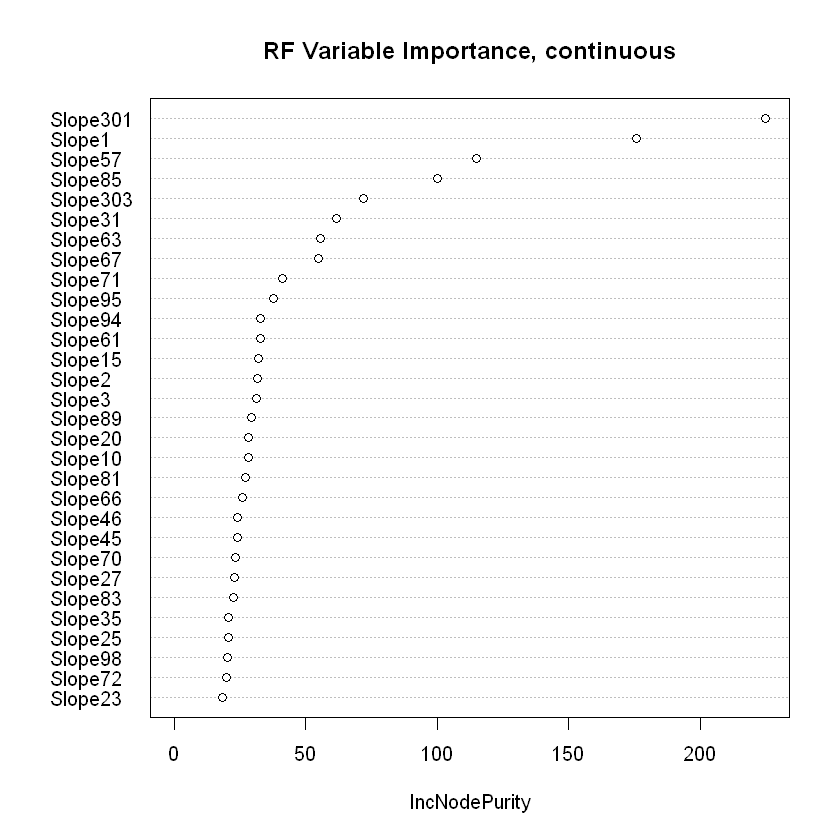

In [16]:
# Random Forest, cont
rf <- randomForest(X,y)
varImpPlot(rf,type=2,main="RF Variable Importance, continuous")

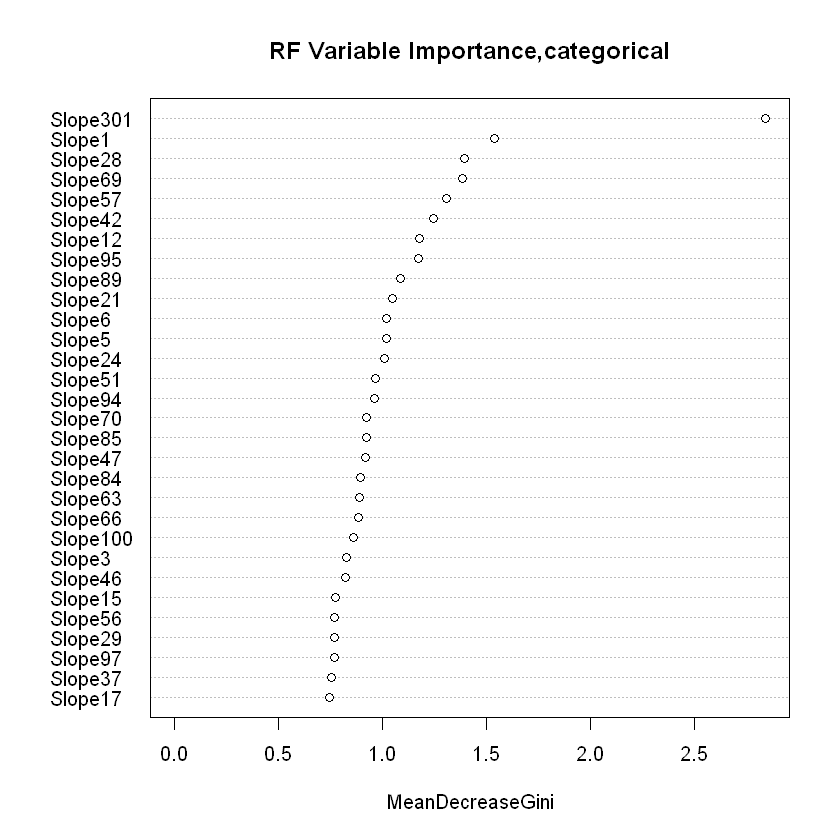

In [17]:
# Random Forest, cat
rf_cat <- randomForest(X,y_cat)
varImpPlot(rf_cat,type=2,main="RF Variable Importance,categorical")

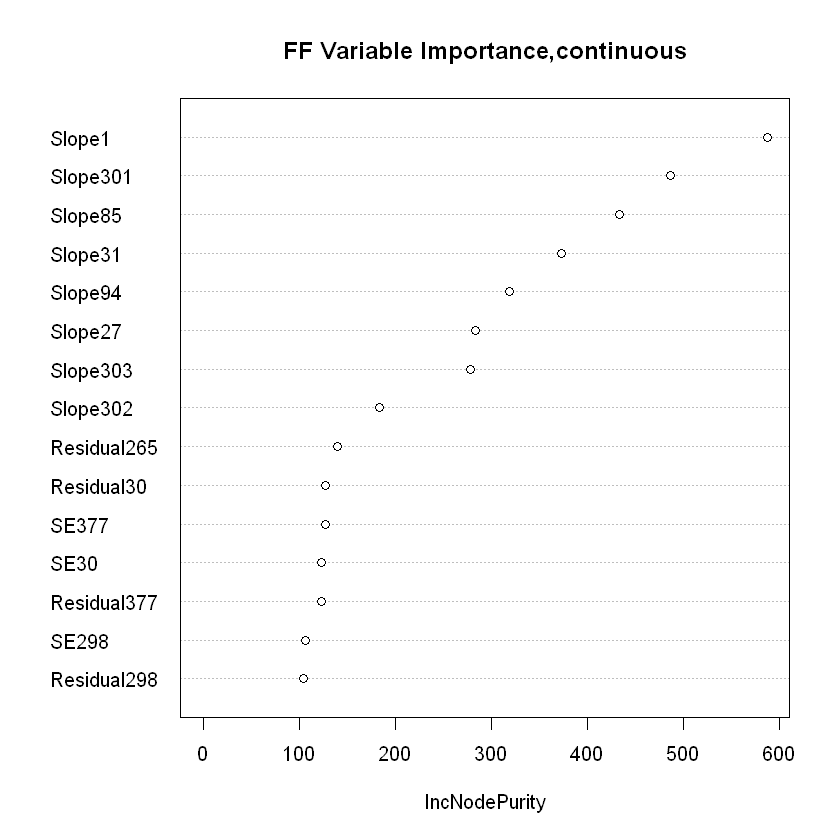

In [18]:
# Fuzzy Forest
# params is stored in xxx_control object
# power: belta (I choose it without much care)
WGCNA_params = WGCNA_control(power=3,TOMType="unsigned",minModuleSize=30,
                            numericLabels=TRUE,pamRespectsDendro=FALSE)

mtry_factor     = 1 # mtry = sqrt(p)*mtry_factor; mtry is the num in subspace method
drop_fraction   = 0.25 # drop xxx in each iteration of RFE-RF
number_selected = 15 # we want 10 out of all features
keep_fraction   = 0.05 # keep xxx for each module
min_ntree        = 500 # used for calculating ntree
ntree_factor    = 5 # used for calculating ntree
final_ntree     = 500 # RF in selecting step

screen_params = screen_control(drop_fraction = drop_fraction,
                              keep_fraction  = keep_fraction,
                              min_ntree      = min_ntree,
                              mtry_factor    = mtry_factor,
                              ntree_factor   = ntree_factor)

select_params = select_control(drop_fraction  = drop_fraction,
                              number_selected = number_selected,
                              min_ntree       = min_ntree,
                              mtry_factor     = mtry_factor,
                              ntree_factor    = ntree_factor)    

# a "fuzzy_forest" object
wff_fit = wff(X,y,WGCNA_params = WGCNA_params,
             screen_params = screen_params,
             select_params = select_params,
             final_ntree = final_ntree)

varImpPlot(wff_fit$final_rf,type=2,main="FF Variable Importance,continuous")

In [19]:
wff_fit[4]

$WGCNA_object
$WGCNA_object$colors
     Slope1         SE1   Residual1      Slope2         SE2   Residual2 
          4           2           2           4           2           2 
     Slope3         SE3   Residual3      Slope4         SE4   Residual4 
          4           2           2           4           2           2 
     Slope5         SE5   Residual5      Slope6         SE6   Residual6 
          4           2           2           4           2           2 
     Slope7         SE7   Residual7      Slope8         SE8   Residual8 
          4           2           2           4           2           2 
     Slope9         SE9   Residual9     Slope10        SE10  Residual10 
          4           2           2           4           2           2 
    Slope11        SE11  Residual11     Slope12        SE12  Residual12 
          4           2           2           4           2           2 
    Slope13        SE13  Residual13     Slope14        SE14  Residual14 
          4     

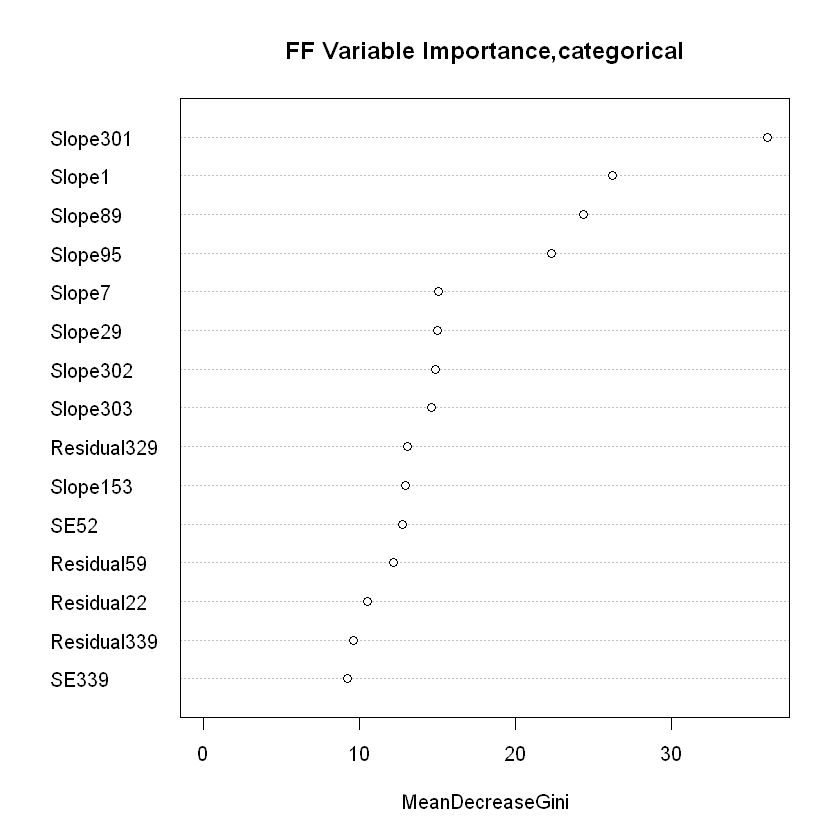

In [20]:
wff_fit = wff(X,y_cat,WGCNA_params = WGCNA_params,
             screen_params = screen_params,
             select_params = select_params,
             final_ntree = final_ntree)

varImpPlot(wff_fit$final_rf,type=2,main="FF Variable Importance,categorical")

In [21]:
wff_fit[4]

$WGCNA_object
$WGCNA_object$colors
     Slope1         SE1   Residual1      Slope2         SE2   Residual2 
          4           2           2           4           2           2 
     Slope3         SE3   Residual3      Slope4         SE4   Residual4 
          4           2           2           4           2           2 
     Slope5         SE5   Residual5      Slope6         SE6   Residual6 
          4           2           2           4           2           2 
     Slope7         SE7   Residual7      Slope8         SE8   Residual8 
          4           2           2           4           2           2 
     Slope9         SE9   Residual9     Slope10        SE10  Residual10 
          4           2           2           4           2           2 
    Slope11        SE11  Residual11     Slope12        SE12  Residual12 
          4           2           2           4           2           2 
    Slope13        SE13  Residual13     Slope14        SE14  Residual14 
          4     